In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os
plt.rcParams["figure.figsize"] = (18, 35)
import warnings
warnings.filterwarnings('ignore')

In [18]:
a = (79940+80213+79801+80167+79912)/5
print('{:.2f}'.format(a))

80006.60


In [3]:
fold = 0
path = 'Models_DART_all_10corr_5folds/'
for fname in os.listdir(path):
            if fname.startswith("HT4_fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                model.save_model(path + 'cp_{}_model.txt'.format(fold))

HT4_fold_0_iter_11038_score_0.79940.pkl


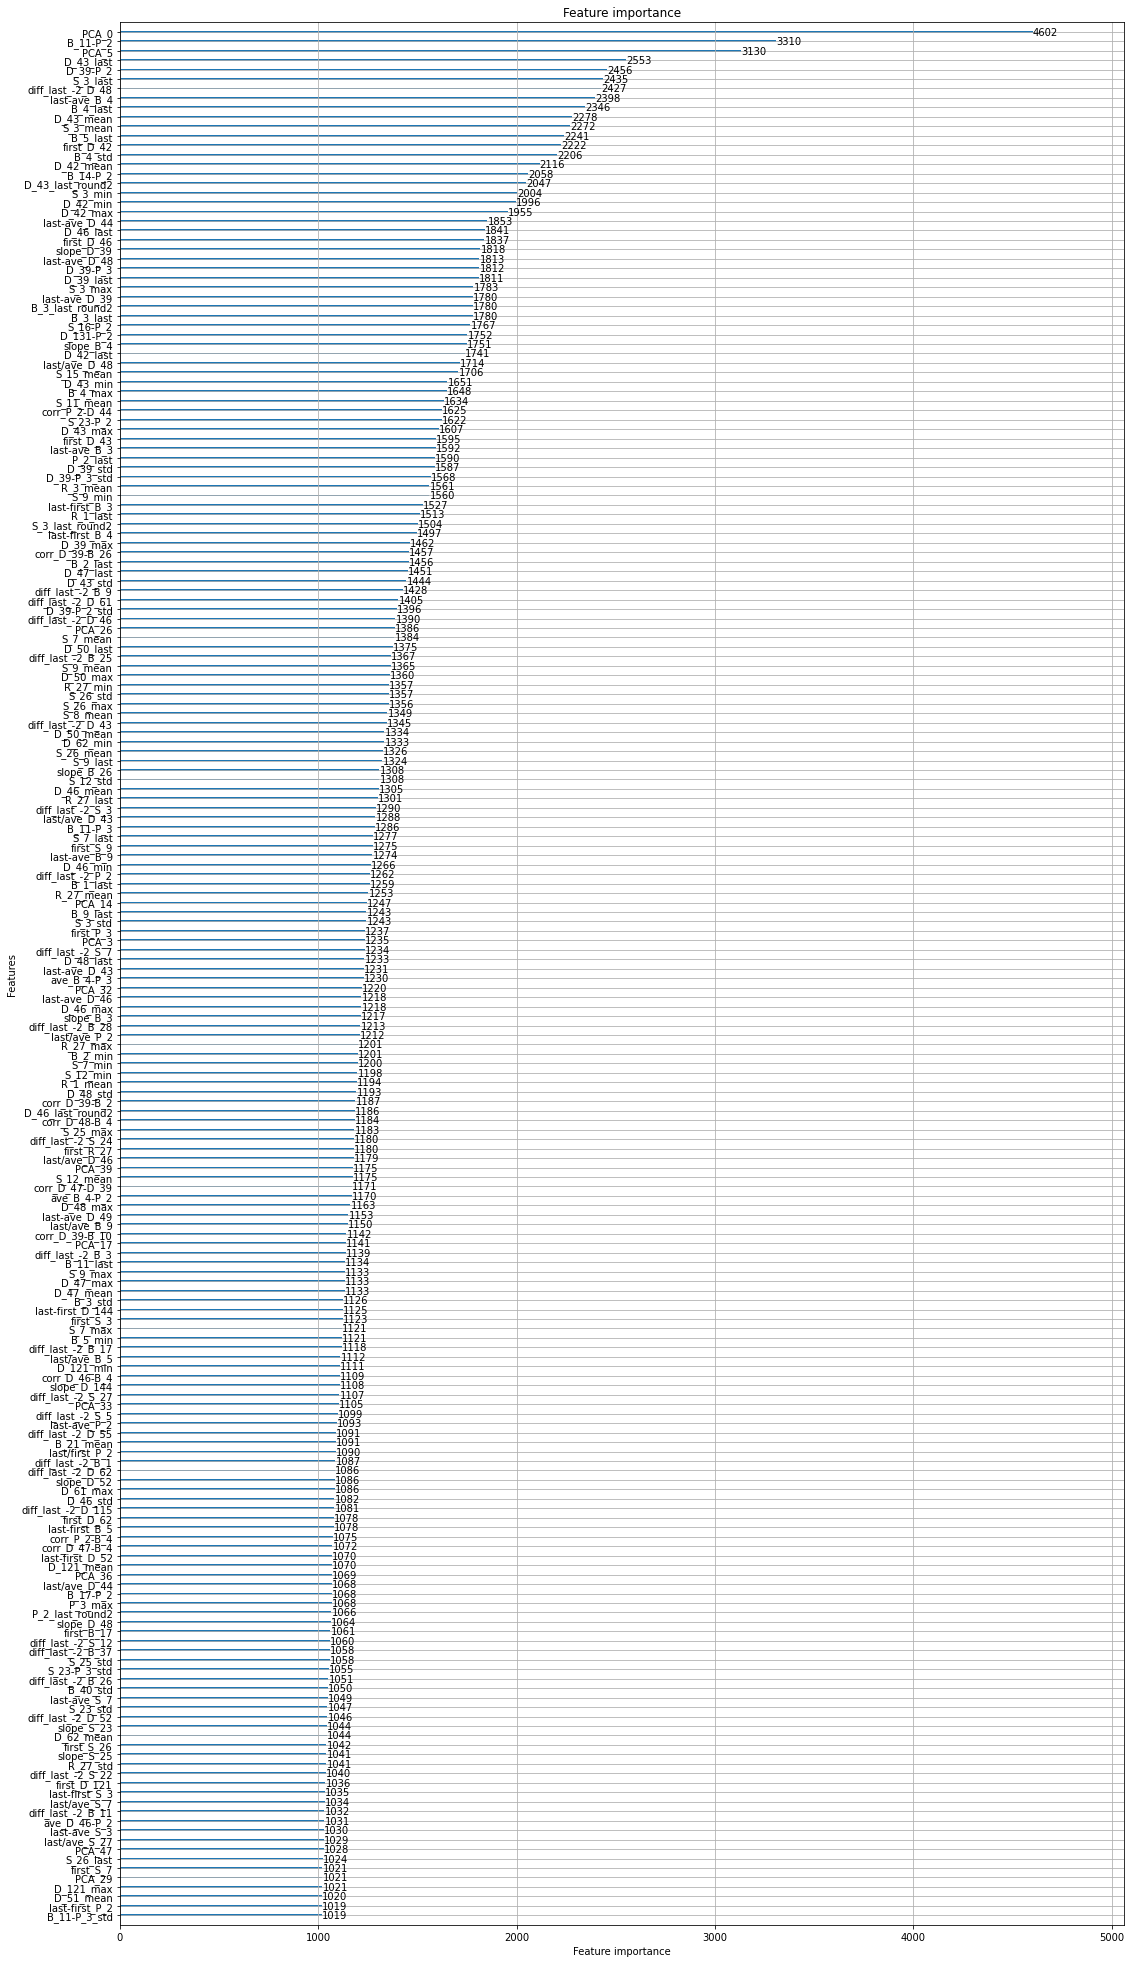

In [5]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [6]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [7]:
df.head(20)

,index,importance
0,PCA_0,4602
1,B_11-P_2,3310
2,PCA_5,3130
3,D_43_last,2553
4,D_39-P_2,2456
5,S_3_last,2435
6,diff_last_-2_D_48,2427
7,last-ave_B_4,2398
8,B_4_last,2346
9,D_43_mean,2278


In [8]:
df[df.importance == 0].shape

(350, 2)

In [9]:
df[df['index'].str.startswith('corr_')]

,index,importance
40,corr_P_2-D_44,1625
55,corr_D_39-B_26,1457
113,corr_D_39-B_2,1187
115,corr_D_48-B_4,1184
122,corr_D_47-D_39,1171
127,corr_D_39-B_10,1142
142,corr_D_46-B_4,1109
159,corr_P_2-B_4,1075
160,corr_D_47-B_4,1072
217,corr_D_44-B_4,1000


In [10]:
df[df['index'].str.startswith('ave_')]

,index,importance
100,ave_B_4-P_3,1230
123,ave_B_4-P_2,1170
189,ave_D_46-P_2,1031
202,ave_D_46-P_3,1016
300,ave_D_39-P_3,931
308,ave_B_11-P_2,926
342,ave_S_16-P_3,898
343,ave_D_48-P_2,898
370,ave_D_131-P_3,883
382,ave_S_23-P_2,877


In [11]:
df[df['index'].str.startswith('cat_')]

,index,importance
1271,cat_-2_D_66,289
1280,cat_-2_D_117,282
1357,cat_first_D_117,214
1386,cat_-2_D_64,195
1497,cat_first_D_64,132
1602,cat_-2_D_114,87
1637,cat_first_D_66,80
1643,cat_first_B_38,78
1650,cat_-2_B_38,77
1706,cat_-2_D_63,60


In [12]:
df[df['index'].str.startswith('NA_')]

,index,importance
1290,NA_D_77,277
1399,NA_D_43,187
1413,NA_S_9,178
1509,NA_S_27,125
1525,NA_D_50,119
...,...,...
2598,NA_R_16,0
2599,NA_D_84,0
2600,NA_R_15,0
2601,NA_R_14,0


In [13]:
df[df['index'].str.startswith('diff_last_')]

,index,importance
6,diff_last_-2_D_48,2427
59,diff_last_-2_B_9,1428
60,diff_last_-2_D_61,1405
62,diff_last_-2_D_46,1390
66,diff_last_-2_B_25,1367
...,...,...
2395,diff_last_-2_R_23,0
2396,diff_last_-2_R_22,0
2397,diff_last_-2_D_89,0
2398,diff_last_-2_R_21,0


In [14]:
df[df['index'].str.startswith('date_')]

,index,importance
299,date_weekday_mean,932
461,date_day_mean,837
725,date_day_last,724
1081,date_day_first,485
1289,date_day_min,278
1312,date_day_max,254
1317,date_weekday_first,248
1441,date_weekday_last,160
1740,date_weekday_max,52
1778,date_month_mean,43


In [15]:
df[df['index'].str.startswith('last/')]

,index,importance
35,last/ave_D_48,1714
83,last/ave_D_43,1288
106,last/ave_P_2,1212
119,last/ave_D_46,1179
126,last/ave_B_9,1150
...,...,...
2371,last/first_D_88,0
2373,last/first_D_89,0
2375,last/first_R_23,0
2376,last/first_D_92,0


In [16]:
df[df['index'].str.startswith('slope_')]

,index,importance
23,slope_D_39,1818
33,slope_B_4,1751
78,slope_B_26,1308
104,slope_B_3,1217
143,slope_D_144,1108
...,...,...
2346,slope_D_88,0
2348,slope_R_18,0
2349,slope_D_87,0
2515,slope_D_110,0


In [17]:
df[df['index'].str.startswith('PCA_')]

,index,importance
0,PCA_0,4602
2,PCA_5,3130
63,PCA_26,1386
92,PCA_14,1247
96,PCA_3,1235
101,PCA_32,1220
121,PCA_39,1175
128,PCA_17,1141
145,PCA_33,1105
163,PCA_36,1069
